### [Problem 1] Feature selection for practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data splicing

In [3]:
df1 = df.loc[:, ['GrLivArea','YearBuilt','SalePrice']]
df1.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [4]:
df1.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [6]:
df1.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [7]:
df1.corr()[['SalePrice']]

,SalePrice
GrLivArea,0.708624
YearBuilt,0.522897
SalePrice,1.000000


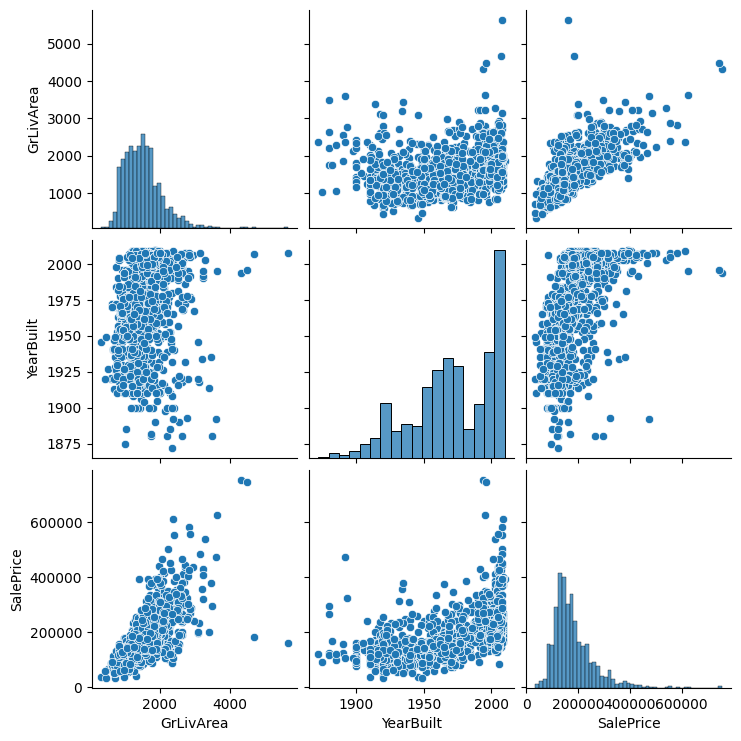

In [8]:
sns.pairplot(df1)

In [9]:
#Split the data
X = df1.loc[:,['GrLivArea','YearBuilt']]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [10]:
y = df1.loc[:, 'SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
y.ndim

1

### [Problem 2] Estimation and evaluation by linear regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape

((1168, 2), (292, 2))

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train_trans = Scaler.transform(X_train)
X_test_trans = Scaler.transform(X_test)

In [14]:
#Training and Estimation
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train , y_train);
y_linear_pred = lreg.predict (X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_linear_pred)
print("MSE: {:,.3f}".format(mse))

MSE: 2,479,423,435.456


In [17]:
lreg.score(X_test, y_test)

0.638130902618274

In [18]:
from sklearn.metrics import r2_score

In [19]:
print('R-squared of the fit: ', r2_score(y_test, y_linear_pred))

R-squared of the fit:  0.638130902618274


In [20]:
print('The intercept and slope coefficients that define the model:')
print(lreg.intercept_)
print(lreg.coef_)

The intercept and slope coefficients that define the model:
-2020979.5743404338
[  95.57358731 1044.17292605]


In [21]:
X_test

,GrLivArea,YearBuilt
780,1253,1995
1283,1824,1971
78,1768,1968
73,1086,1954
190,2727,1932
...,...,...
150,969,1975
790,1145,2005
608,3194,1934
1078,848,2004


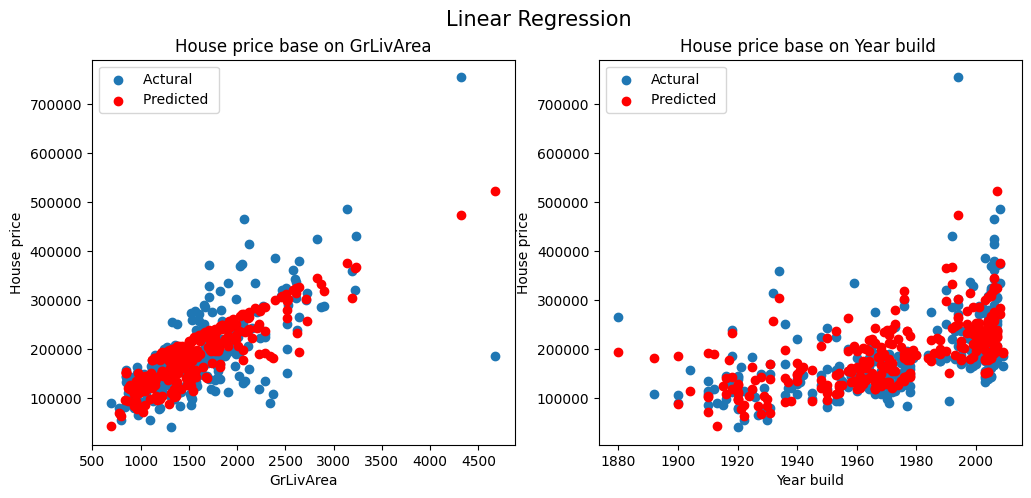

In [31]:
def visualization(ypred , title ):
  fig, (ax1, ax2) = plt.subplots (nrows=1, ncols=2, figsize=(12 , 5))
  ax1.scatter (X_test.loc [:, 'GrLivArea'] , y_test)
  ax1.scatter (X_test.loc [:, 'GrLivArea' ], ypred, c = 'red')
  classes = ['Actural ', "Predicted "]
  ax1.legend (labels = classes)
  ax1.set(title = "House price base on GrLivArea", xlabel = 'GrLivArea', ylabel='House price')

  ax2.scatter (X_test.loc [:, 'YearBuilt'], y_test )
  ax2.scatter (X_test.loc [:, 'YearBuilt'], ypred , c='red')
  classes = [ 'Actural' , "Predicted "]
  ax2.legend (labels = classes)
  ax2.set(title= "House price base on Year build ", xlabel = 'Year build' , ylabel = 'House price' )

  fig.suptitle(title, fontsize=15)
visualization (y_linear_pred , "Linear Regression ")

### [Problem 3] Comparison of methods

In [25]:
#SVM
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_svr_pred = svr_reg.predict(X_test)

In [27]:
svr_mse = mean_squared_error(y_test, y_svr_pred)
print("MSE: {:,.3f}".format(svr_mse))

MSE: 7,450,358,061.667


In [ ]:
print('R-squared of the SVM: ', r2_score(y_test, y_svr_pred))

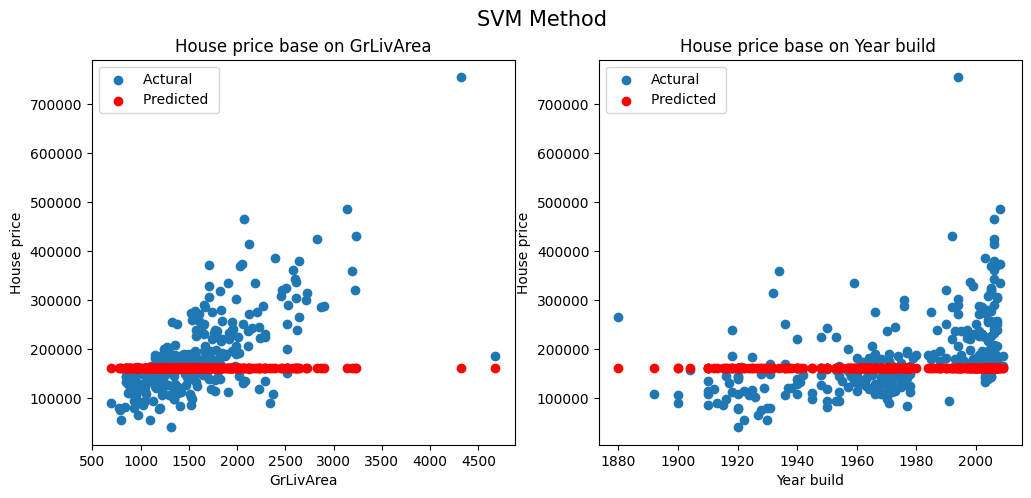

In [33]:
#Visualization of results
visualization(y_svr_pred, "SVM Method")

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_rf_pred = rf_reg.predict (X_test )

In [35]:
rf_mse = mean_squared_error(y_test, y_rf_pred)
print("MSE: {:,.3f}".format(rf_mse))

MSE: 2,209,506,018.987


In [36]:
print('R-squared of the Random Forest: ', r2_score(y_test, y_rf_pred))

R-squared of the Random Forest:  0.6775250498496496


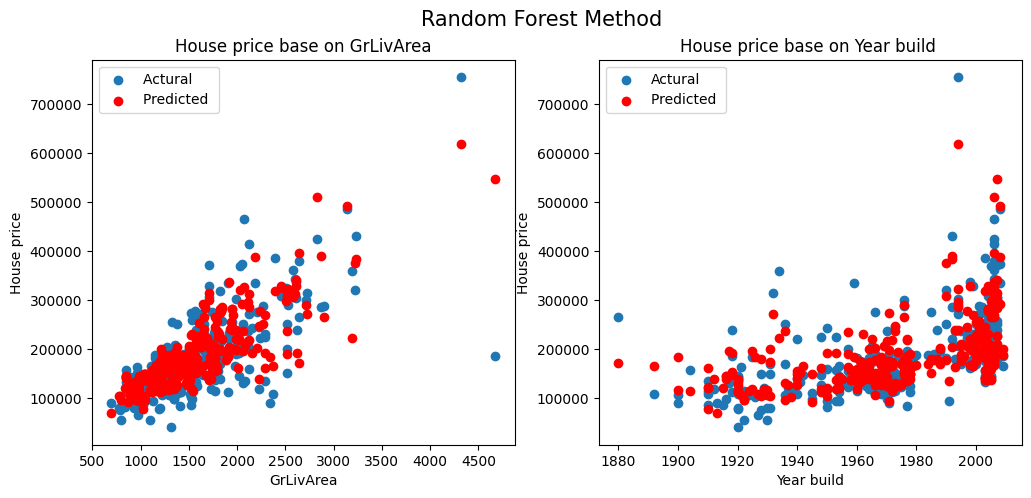

In [37]:
#Visualization of results
visualization(y_rf_pred, "Random Forest Method")

In [38]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_dt_pred = dt_reg.predict (X_test )

In [39]:
dt_mse = mean_squared_error(y_test, y_dt_pred)
print("MSE: {:,.3f}".format(dt_mse))

MSE: 4,140,780,598.590


In [40]:
print('R-squared of the Decision tree: ', r2_score(y_test, y_dt_pred))

R-squared of the Decision tree:  0.39565766934357527


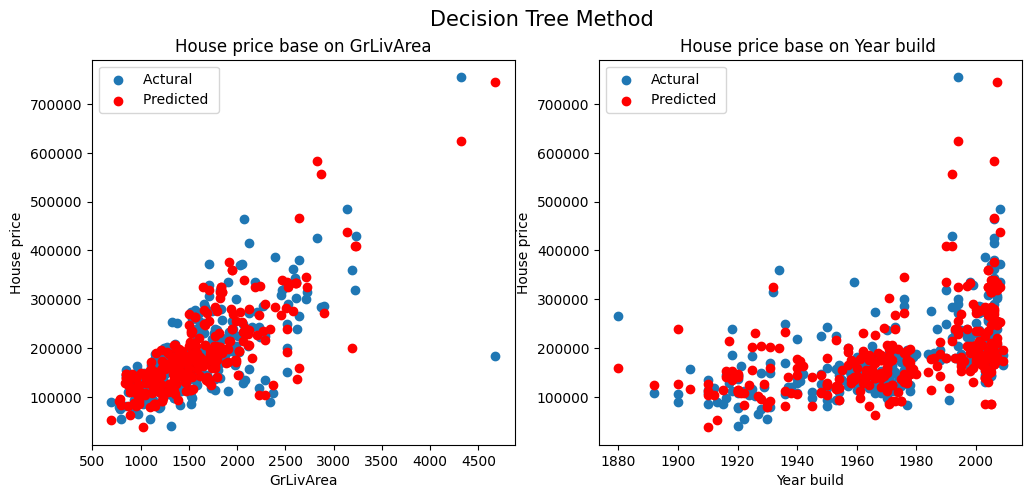

In [41]:
#Visualization of results
visualization(y_dt_pred, "Decision Tree Method")

### [Problem 4] (Advance assignment) Learning using other features

<ipython-input-65-809e401eb033>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('Id', axis=1).corr().sort_values(by = ['SalePrice'], ascending=False).head(1), cmap = 'coolwarm', annot=True, annot_kws = {'size':7})


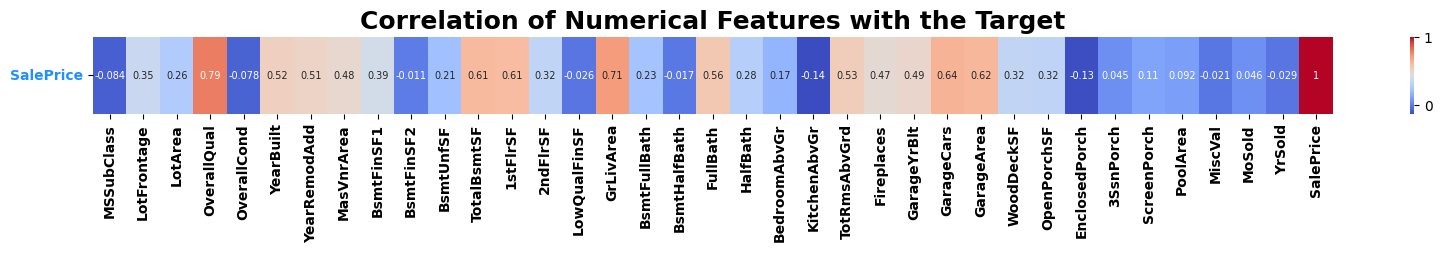

In [65]:
plt.figure (figsize = (20, 1) )
sns.heatmap(df.drop('Id', axis=1).corr().sort_values(by = ['SalePrice'], ascending=False).head(1), cmap = 'coolwarm', annot=True, annot_kws = {'size':7})
plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold' )
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation=0)

plt.show ()

In [44]:
train = df.loc[:,[ 'OverallQual', 'YearBuilt' , 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF' , 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'SalePrice' ]]
train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,2,548,208500
1,6,1976,1976,1262,1262,1262,2,2,460,181500
2,7,2001,2002,920,920,1786,2,2,608,223500
3,7,1915,1970,756,961,1717,1,3,642,140000
4,8,2000,2000,1145,1145,2198,2,3,836,250000


In [46]:
train.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [47]:
train.corr()['SalePrice'].sort_values(ascending=False).to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
YearBuilt,0.522897
YearRemodAdd,0.507101


In [48]:
#Split data into X and y
X1 = train.drop(['SalePrice'], axis = 1)
X1.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,2,548
1,6,1976,1976,1262,1262,1262,2,2,460
2,7,2001,2002,920,920,1786,2,2,608
3,7,1915,1970,756,961,1717,1,3,642
4,8,2000,2000,1145,1145,2198,2,3,836


In [49]:
y1 =train.loc[:, 'SalePrice']
y1

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [50]:
#Split into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25)
X_train.shape, X_test.shape

((1168, 2), (292, 2))

In [54]:
# Linear Regression
print('Linear Regression')
lreg  = LinearRegression()
lreg.fit(X1_train, y1_train)
y_linear_pred1 = lreg.predict (X1_test)
mse1 = mean_squared_error(y1_test, y_linear_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', lreg.score(X1_test, y1_test))
print('.....................................')

#SVM
print('SVM')
svr_reg = SVR()
svr_reg.fit(X1_train, y1_train)
y_svr_pred1 = svr_reg.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_svr_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', svr_reg.score(X1_test, y1_test))
print('.....................................')

# Random Forest
print('Random Forest')
rf_reg = RandomForestRegressor()
rf_reg.fit(X1_train, y1_train)
y_rf_pred1 = rf_reg.predict (X1_test)
mse1 = mean_squared_error(y1_test, y_rf_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', rf_reg.score(X1_test, y1_test))
print('.....................................')

# DECISION TREE
print('Decision Tree')
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X1_train, y1_train)
y_dt_pred1 = dt_reg.predict (X1_test)
mse1 = mean_squared_error(y1_test, y_dt_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', dt_reg.score(X1_test, y1_test))
print('.....................................')

Linear Regression
MSE: 2,328,023,144.788
Model Score:  0.6456266823246344
.....................................
SVM
MSE: 7,036,970,308.679
Model Score:  -0.07117256125741211
.....................................
Random Forest
MSE: 1,218,882,043.135
Model Score:  0.8144609195798672
.....................................
Decision Tree
MSE: 2,150,140,787.855
Model Score:  0.6727040595936735
.....................................


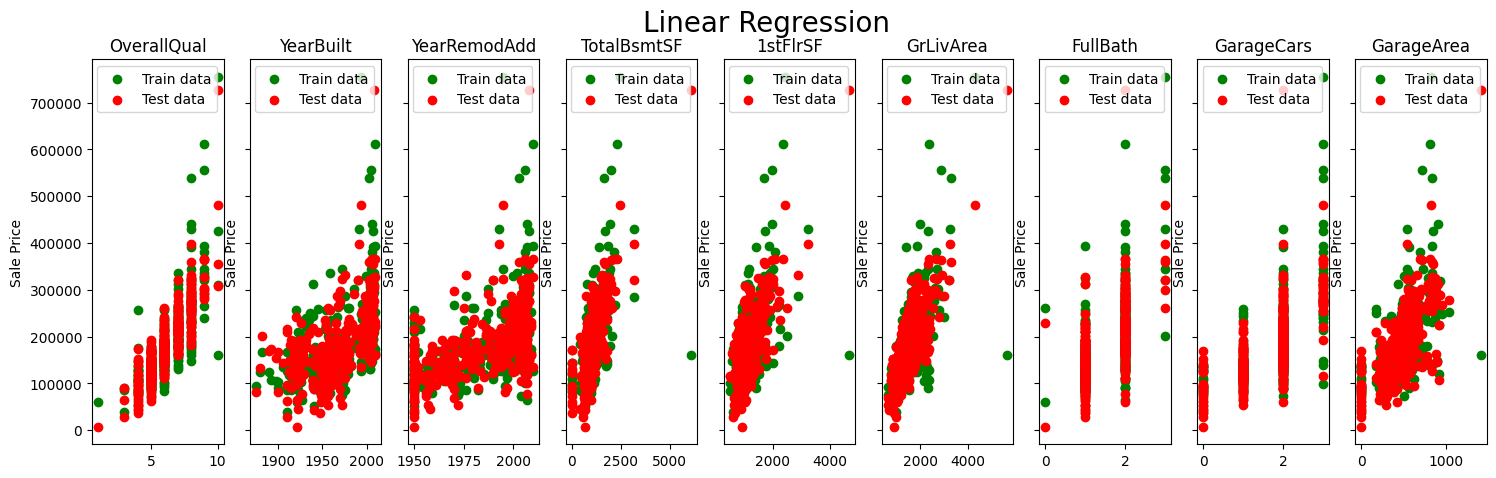

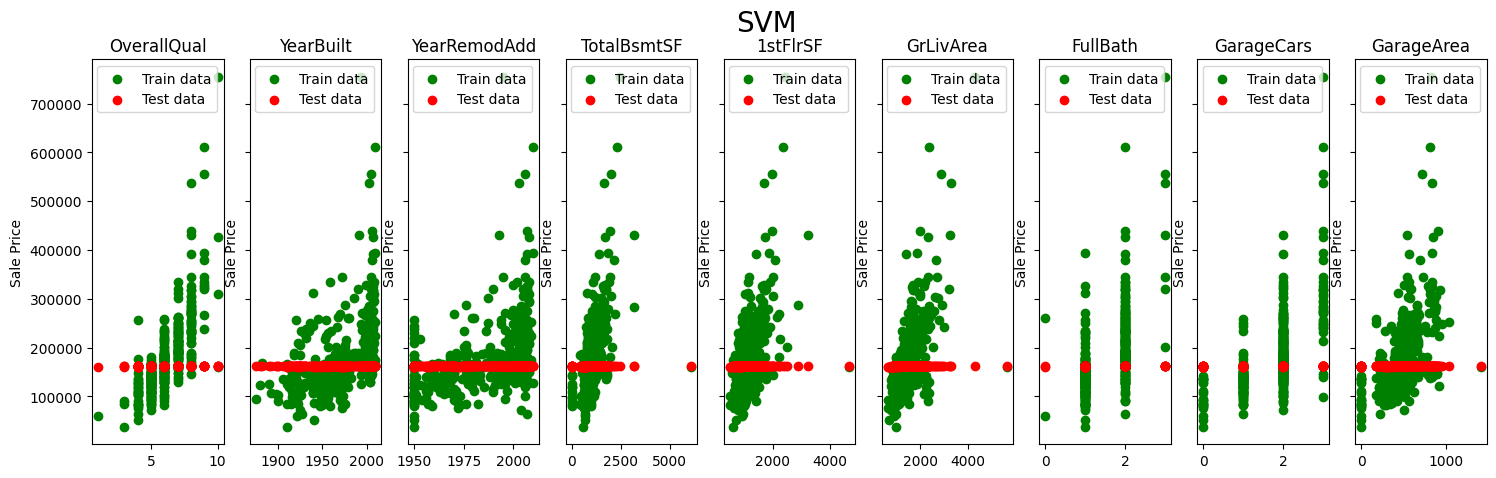

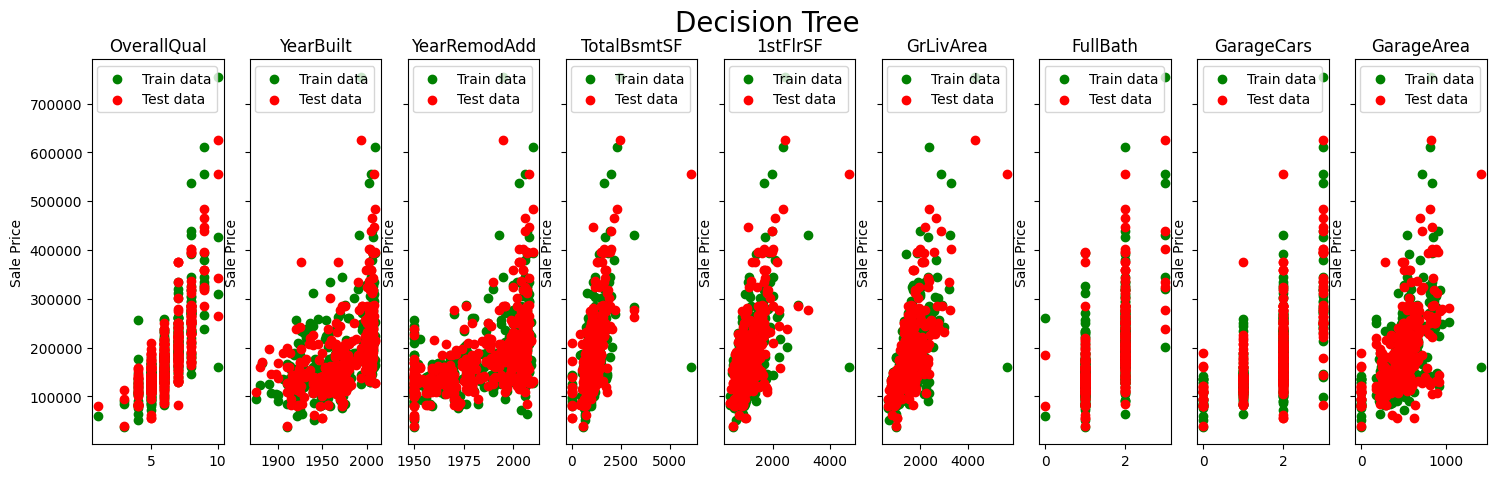

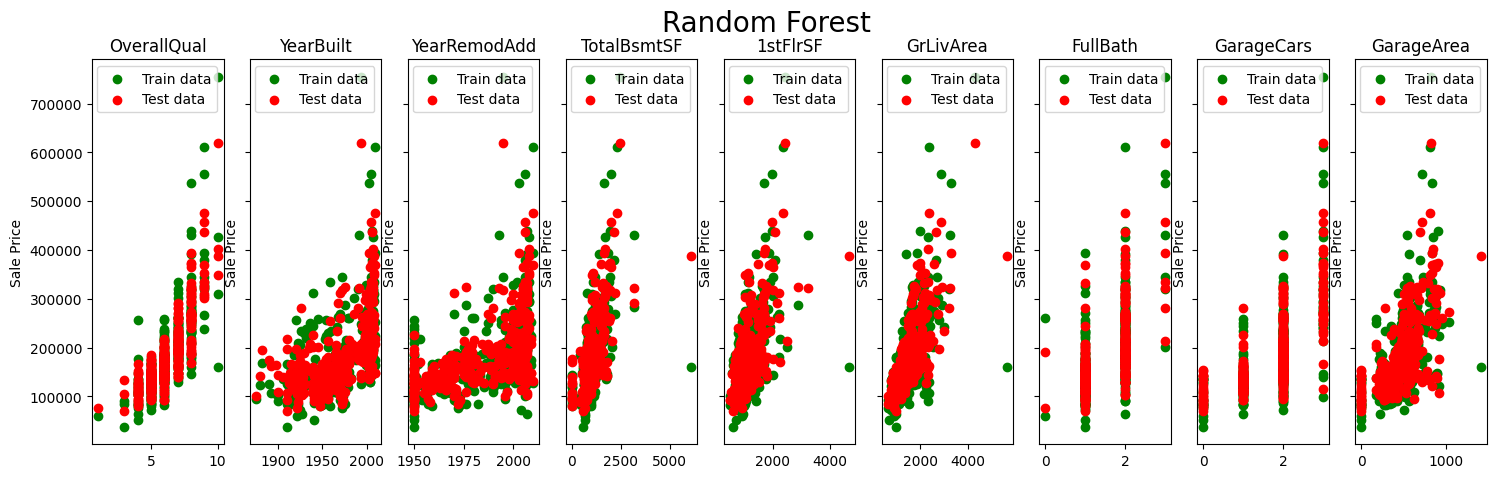

In [57]:
# Display the scatter plot
# using a function
def regression_models (X1_train, X1_test, y1_train, y1_test, feature_list):
  method_list = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
  lr = LinearRegression().fit(X1_train, y1_train).predict(X1_test),
  svr = SVR().fit(X1_train, y1_train).predict(X1_test),
  dt = DecisionTreeRegressor().fit(X1_train, y1_train).predict(X1_test),
  rf = RandomForestRegressor().fit(X1_train, y1_train).predict(X1_test)
  ypreds = [lr, svr, dt, rf]
  for method, y_pred in zip (method_list, ypreds):
    fig, ax = plt.subplots(1, len(feature_list), figsize = (2*len(feature_list),5), sharey = True)
    fig.suptitle(method, size=20)
    for i in range(len(feature_list)):
      ax[i].scatter(X1_test.iloc[:,i], y1_test, c="green", label = "Train data")
      fig.suptitle(method, size=20)
      ax[i].scatter(X1_test.iloc[:,i], y_pred , c="red", label="Test data")
      ax[i].set_title(feature_list[i])
      ax[i].set_ylabel('Sale Price')
      ax[i].legend()
    plt.show()

feature_list = [ 'OverallQual', 'YearBuilt' , 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF' , 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea' ]
regression_models(X1_train, X1_test, y1_train, y1_test, feature_list)